# Task 6 : Data Analysis & Data Science

### DESCRIPTION :
The project involves selecting a dataset of interest and performing a comprehensive analysis to extract meaningful insights. The project, further requires applying the full data science workflow, including data cleaning, exploratory data analysis (EDA), question formulation, and data visualization.

### RESPONSIBILITY :
1.Data Cleaning: Handle missing data, outliers, and inconsistencies to ensure the dataset is suitable for analysis. 

2.Exploratory Data Analysis (EDA): Perform EDA to understand the distribution of data, relationships between variables.

3.Develop specific minimum 4-6 questions related to the dataset and solve each question by using appropriate functions.

4.Data Visualization: Created visualizations using tools like Matplotlib, Seaborn, to effectively present the findings and insights gained from the analysis. This included charts, graphs, and other visual aids to make the results easy to understand.

### Objective : To analyze Netflix Content Feeds and determine factors that enhances Personalized Experience with the overarching aim of Promoting Business Recommendations for Netflix Inc. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from datetime import datetime

In [2]:
data = pd.read_csv('D:/Arkabho Documents/Arkabho Folders/Arkabho Files/GS&Service_FilesandFolders/Internships/MainFlow Technologies/Task 6/netflix.csv')

In [3]:
data.head(10)

,title,genre,language,premiere,year,imdb_score,runtime
0,Notes for My Son,Drama,Spanish,11/24/2020,2020,6.3,83
1,"To Each, Her Own",Romantic comedy,French,6/24/2018,2018,5.3,95
2,The Lovebirds,Romantic comedy,English,5/22/2020,2020,6.1,87
3,The Perfection,Horror-thriller,English,5/24/2019,2019,6.1,90
4,Happy Anniversary,Romantic comedy,English,3/30/2018,2018,5.8,78
5,Why Did You Kill Me?,Documentary,English,4/14/2021,2021,5.6,83
6,Death to 2020,Comedy,English,12/27/2020,2020,6.8,70
7,Brene Brown: The Call to Courage,Documentary,English,4/19/2019,2019,7.7,76
8,Operation Christmas Drop,Romantic comedy,English,11/5/2020,2020,5.8,96
9,The Lonely Island Presents: The Unauthorized B...,Comedy / Musical,English,5/23/2019,2019,6.9,30


### Data Pre-Processing :-

#### Generating Summary of Dataset :

In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   title       583 non-null    object 
 1   genre       583 non-null    object 
 2   language    583 non-null    object 
 3   premiere    583 non-null    object 
 4   year        583 non-null    int64  
 5   imdb_score  583 non-null    float64
 6   runtime     583 non-null    int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 32.0+ KB
None


In [5]:
print(data.shape)

(583, 7)


 The given dataset has 583 rows and 7 columns"

#### Missing Value Check :-

In [6]:
print(data.isna().sum())

title         0
genre         0
language      0
premiere      0
year          0
imdb_score    0
runtime       0
dtype: int64


 Therefore, the given dataset does not contain any missing values in it.

#### Duplicate Checklist :

In [7]:
print(data.duplicated().any())

False


Therefore, the given dataset does not contain any duplicate values in it.

#### Data Formatting :

In [8]:
data['premiere'] = pd.to_datetime(data['premiere'], errors='coerce')


In [9]:
data['premiere'] = data['premiere'].dt.strftime('%Y-%B')

In [10]:
print(data.dtypes)

title          object
genre          object
language       object
premiere       object
year            int64
imdb_score    float64
runtime         int64
dtype: object


In [11]:
data.head()

,title,genre,language,premiere,year,imdb_score,runtime
0,Notes for My Son,Drama,Spanish,2020-November,2020,6.3,83
1,"To Each, Her Own",Romantic comedy,French,2018-June,2018,5.3,95
2,The Lovebirds,Romantic comedy,English,2020-May,2020,6.1,87
3,The Perfection,Horror-thriller,English,2019-May,2019,6.1,90
4,Happy Anniversary,Romantic comedy,English,2018-March,2018,5.8,78


 Therefore, the data is now appropriately formatted

#### Summary Statistics & Outlier Detection :-

In [12]:
data[['imdb_score','runtime']].describe()

,imdb_score,runtime
count,583.000000,583.000000
mean,6.275129,93.490566
std,0.976678,27.706665
min,2.500000,4.000000
25%,5.700000,86.000000
50%,6.400000,97.000000
75%,7.000000,107.500000
max,9.000000,209.000000


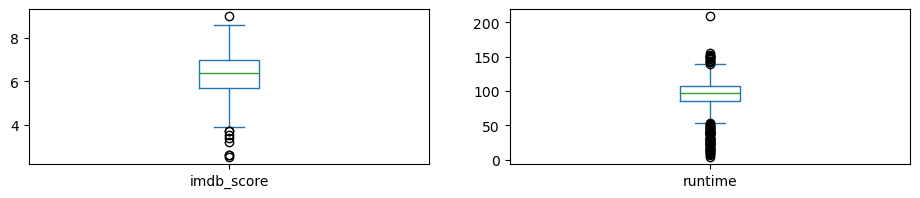

In [13]:
data[['imdb_score','runtime']].plot(kind='box',layout=(25,5),subplots=True,sharex=False,sharey=False,figsize=(30,60))
plt.show()


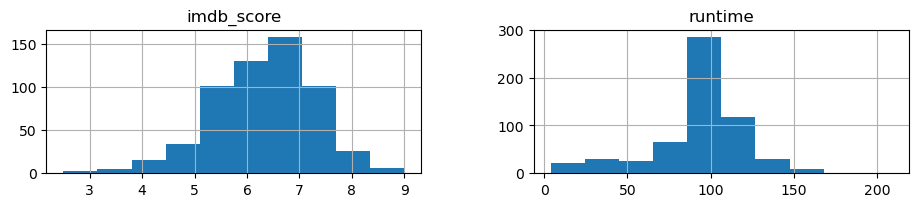

In [14]:
data[['imdb_score','runtime']].hist(layout=(25,5),figsize=(30,60))
plt.show()

Based on the above analysis it can be ascertained that the given dataset contains outliers

In [15]:
z1 = stats.zscore(data['imdb_score'])
z2 = stats.zscore(data['runtime'])

In [16]:
data.insert(0,'Z_Score_imdb_score',list(z1),True)
data.insert(0,'Z_Score_runtime',list(z2),True)

In [17]:
data.head()

,Z_Score_runtime,Z_Score_imdb_score,title,genre,language,premiere,year,imdb_score,runtime
0,-0.378955,0.025487,Notes for My Son,Drama,Spanish,2020-November,2020,6.3,83
1,0.054526,-0.999271,"To Each, Her Own",Romantic comedy,French,2018-June,2018,5.3,95
2,-0.234461,-0.179465,The Lovebirds,Romantic comedy,English,2020-May,2020,6.1,87
3,-0.126091,-0.179465,The Perfection,Horror-thriller,English,2019-May,2019,6.1,90
4,-0.559572,-0.486892,Happy Anniversary,Romantic comedy,English,2018-March,2018,5.8,78


Filtering Data based on Z-Scores

In [18]:
data.loc[data['Z_Score_runtime'] > 1.96, 'runtime'] = np.nan
data.loc[data['Z_Score_runtime'] < -1.96, 'runtime'] = np.nan

data.loc[data['Z_Score_imdb_score'] > 1.96, 'imdb_score'] = np.nan
data.loc[data['Z_Score_imdb_score'] < -1.96, 'imdb_score'] = np.nan

In [19]:
data.drop(columns=['Z_Score_runtime','Z_Score_imdb_score'],axis=1,inplace=True)
data.head()

,title,genre,language,premiere,year,imdb_score,runtime
0,Notes for My Son,Drama,Spanish,2020-November,2020,6.3,83.0
1,"To Each, Her Own",Romantic comedy,French,2018-June,2018,5.3,95.0
2,The Lovebirds,Romantic comedy,English,2020-May,2020,6.1,87.0
3,The Perfection,Horror-thriller,English,2019-May,2019,6.1,90.0
4,Happy Anniversary,Romantic comedy,English,2018-March,2018,5.8,78.0


In [20]:
print(data.isnull().sum())

title          0
genre          0
language       0
premiere       0
year           0
imdb_score    31
runtime       51
dtype: int64


From the above analysis it can be seen that the Z-Score filtered dataset consists of Outliers

In [21]:
data['imdb_score'] = data['imdb_score'].fillna(data['imdb_score'].mean())
data['runtime'] = data['runtime'].fillna(data['runtime'].median())
print(data.isnull().sum())

title         0
genre         0
language      0
premiere      0
year          0
imdb_score    0
runtime       0
dtype: int64


In [22]:
print(data.dtypes)

title          object
genre          object
language       object
premiere       object
year            int64
imdb_score    float64
runtime       float64
dtype: object


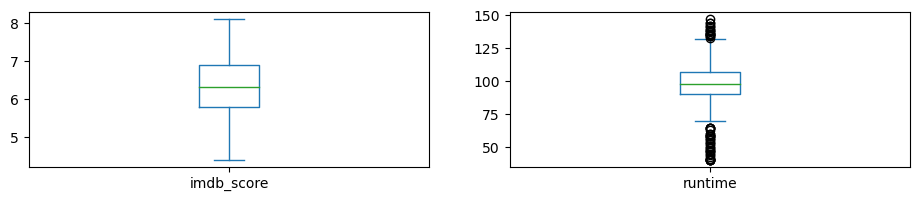

In [23]:
data[['imdb_score','runtime']].plot(kind='box',layout=(25,5),subplots=True,sharex=False,sharey=False,figsize=(30,60))
plt.show()

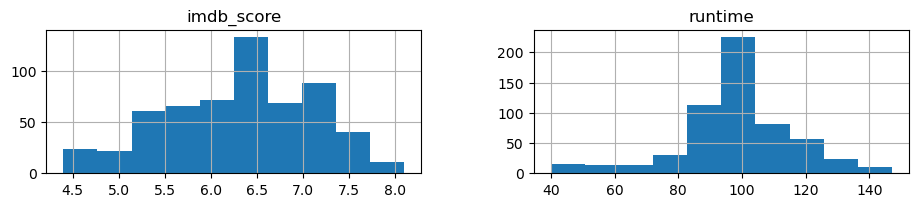

In [24]:
data[['imdb_score','runtime']].hist(layout=(25,5),figsize=(30,60))
plt.show()

In [25]:
print(data.shape)

(583, 7)


Based on the above analysis it can be said that the data is clean with no missing values and is ready for further analysis

### Question Bank :

1.Determine the different types of content feed for Netflix by Genre ? Perform information visualization to represent the distribution of content feed by genre ?

2.Determine the different types of content feed for Netflix by Language ? Perform information visualization to represent the distribution of content feed by Language ?

3.Identify content feed by Genre with the Premiere dates ? Perform Visualization to represent popular content category with Premiere dates ?

4.Determine popularity of Content Feed Genre by their runtime ? Perform appropriate visualization to represent the same (User engagement for the given category) ? Identify the top 5 genre-categories based on their runtime ?

5.Determine popularity of Content Feed Genre by their imdb_score metric ? Perform appropriate visualization to represent the same ? Identify the top 5 genre-categories based on their imdb_score ?

6.Determine the average popularity of content-feed genre based on imdb_score and Runtime ? Represent the same using appropriate visualization ?

In [26]:
# 1. To determine and analyze different content feed types for Netflix by Genre ---
data['genre'].value_counts()

genre
Documentary                    159
Drama                           77
Comedy                          49
Romantic comedy                 39
Thriller                        33
                              ... 
Political thriller               1
Fantasy                          1
Romantic comedy-drama            1
Animation/Musical/Adventure      1
Supernatural drama               1
Name: count, Length: 114, dtype: int64

In [27]:
print(data['genre'].nunique())

114


For the given dataset we have a total of 114 unique genres

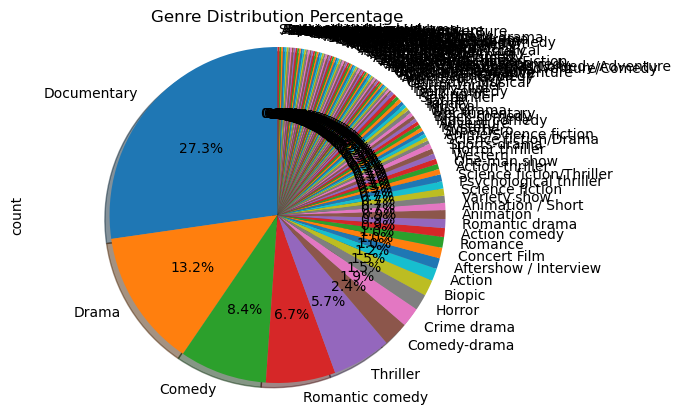

In [28]:
data['genre'].value_counts().plot(kind='pie',autopct='%1.1f%%',shadow=True,startangle=90)
plt.title('Genre Distribution Percentage')
plt.axis('equal')
plt.show()

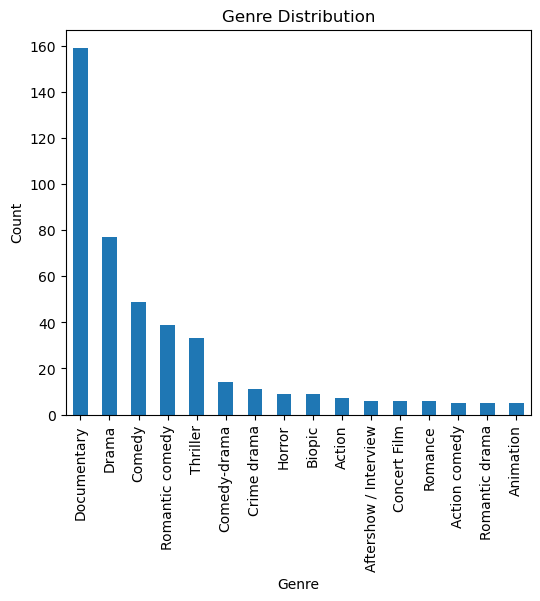

In [29]:
data['genre'].value_counts()[data['genre'].value_counts() >= 5].plot(kind='bar',figsize=(6,5))
plt.title('Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks()
plt.show()

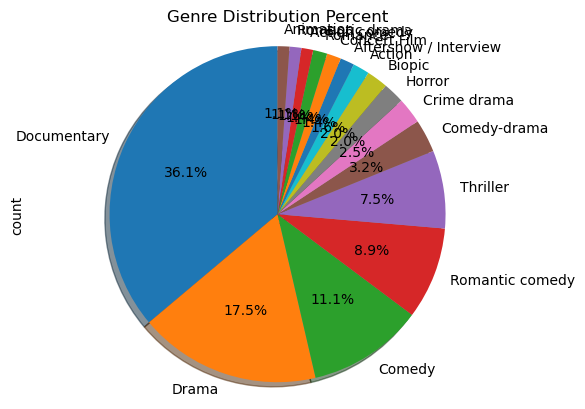

In [30]:
# Furthermore, we have the following :
data['genre'].value_counts()[data['genre'].value_counts() >= 5].plot(kind='pie',autopct='%1.1f%%',startangle=90,shadow=True)
plt.title('Genre Distribution Percent')
plt.axis('equal')
plt.show()

From the above analysis it can be ascertained that Documentary (27.3%) is the most frequently arising content feed type, followed by Drama (13.2%), thereafter followed by Comedy (8.4%), Romantic Comedy (6.7%) and Thriller(5.7%) and so on.

In [31]:
# 2. To determine and analyze different content feed types for Netflix by Language ---
data['language'].value_counts()

language
English                       401
Hindi                          32
Spanish                        31
French                         20
Italian                        14
Portuguese                     12
Indonesian                      9
Korean                          6
Japanese                        6
English/Spanish                 5
German                          5
Turkish                         5
Polish                          3
Dutch                           3
Marathi                         3
Filipino                        2
Thai                            2
English/Japanese                2
English/Hindi                   2
English/Mandarin                2
English/Korean                  1
Khmer/English/French            1
English/Akan                    1
Bengali                         1
English/Swedish                 1
English/Arabic                  1
English/Taiwanese/Mandarin      1
Norwegian                       1
Tamil                           1
Engli

In [32]:
data['language'].value_counts(normalize=True)

language
English                       0.687822
Hindi                         0.054889
Spanish                       0.053173
French                        0.034305
Italian                       0.024014
Portuguese                    0.020583
Indonesian                    0.015437
Korean                        0.010292
Japanese                      0.010292
English/Spanish               0.008576
German                        0.008576
Turkish                       0.008576
Polish                        0.005146
Dutch                         0.005146
Marathi                       0.005146
Filipino                      0.003431
Thai                          0.003431
English/Japanese              0.003431
English/Hindi                 0.003431
English/Mandarin              0.003431
English/Korean                0.001715
Khmer/English/French          0.001715
English/Akan                  0.001715
Bengali                       0.001715
English/Swedish               0.001715
English/Arabic  

In [33]:
data['language'].value_counts()[data['language'].value_counts() > 4]

language
English            401
Hindi               32
Spanish             31
French              20
Italian             14
Portuguese          12
Indonesian           9
Korean               6
Japanese             6
English/Spanish      5
German               5
Turkish              5
Name: count, dtype: int64

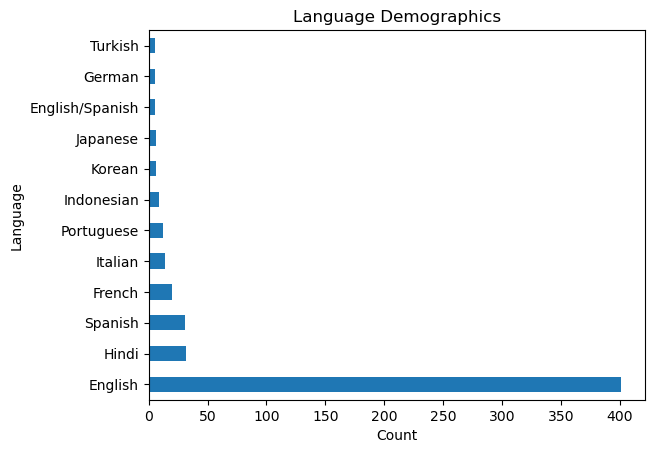

In [34]:
data['language'].value_counts()[data['language'].value_counts() > 4].plot(kind='barh')
plt.title('Language Demographics')
plt.xlabel('Count')
plt.ylabel('Language')
plt.show()

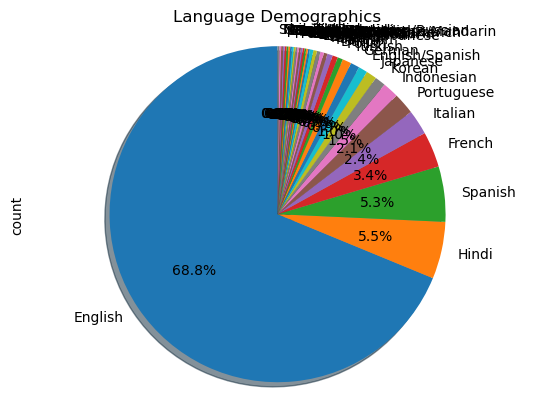

In [35]:
data['language'].value_counts().plot(kind='pie',autopct='%1.1f%%',startangle=90,shadow=True)
plt.title('Language Demographics')
plt.axis('equal')
plt.show()

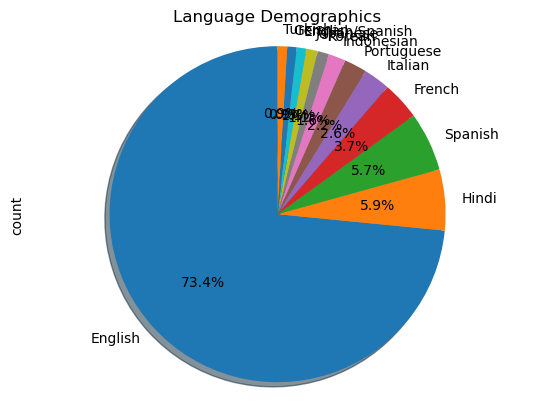

In [36]:
data['language'].value_counts()[data['language'].value_counts() > 4].plot(kind='pie',autopct='%1.1f%%',startangle=90,shadow=True)
plt.title('Language Demographics')
plt.axis('equal')
plt.show()

Based on the above analysis it can be said that majority of viewers are English (68.8%), followed by Hindi (5.5%), Spanish (5.3%), French (3.4%), Italian (2.1%), Portugese (1.5%), Indonesian (1.2%), Korean(1.2%), Japanese(1.2%), German(< 1%) and so on.

Therefore, the majority of viewers of the given dataset population is English.

In [37]:
# 3. To identify and analyze content feed (by Genre) based on Premiere Dates
Genre_and_Premiere_Dates_group = data.groupby('premiere')['genre'].sum()
Genre_and_Premiere_Dates_group

premiere
2014-December                                          Documentary
2015-December                              WesternComedy / Musical
2015-July                                              Documentary
2015-June                                              Documentary
2015-May                                    DocumentaryDocumentary
                                       ...                        
2021-April       DocumentaryDramaPsychological thriller dramaCo...
2021-February    Romantic comedyThrillerScience fictionRomantic...
2021-January     DramaAction/Science fictionDramaDocumentaryDra...
2021-March       ActionRomantic teen dramaComedyDramaDramaHidde...
2021-May         ThrillerDramaCrime dramaScience fiction thrill...
Name: genre, Length: 70, dtype: object

In [38]:
Genre_and_Premiere_Dates_group = Genre_and_Premiere_Dates_group.to_frame()
Genre_and_Premiere_Dates_group 

,genre
premiere,
2014-December,Documentary
2015-December,WesternComedy / Musical
2015-July,Documentary
2015-June,Documentary
2015-May,DocumentaryDocumentary
...,...
2021-April,DocumentaryDramaPsychological thriller dramaCo...
2021-February,Romantic comedyThrillerScience fictionRomantic...
2021-January,DramaAction/Science fictionDramaDocumentaryDra...


In [39]:
Genre_and_Premiere_Dates_group.value_counts() 

genre                                                                                                                                                                                                                   
Documentary                                                                                                                                                                                                                 4
DramaRomantic comedyPolitical thrillerRomantic comedyMaking-ofRomanceDrama                                                                                                                                                  1
RomanceComedyDocumentaryComedy horrorDocumentaryDocumentaryHorror thrillerDocumentaryDramaDocumentary                                                                                                                       1
HorrorHeist film/ThrillerDramaMusical comedyDocumentaryRomanceThrillerDocumentaryFamily/Comedy-dramaDramaDocumentaryA

In [40]:
Genre_and_Premiere_Dates_group.value_counts(normalize=True)

genre                                                                                                                                                                                                                   
Documentary                                                                                                                                                                                                                 0.057143
DramaRomantic comedyPolitical thrillerRomantic comedyMaking-ofRomanceDrama                                                                                                                                                  0.014286
RomanceComedyDocumentaryComedy horrorDocumentaryDocumentaryHorror thrillerDocumentaryDramaDocumentary                                                                                                                       0.014286
HorrorHeist film/ThrillerDramaMusical comedyDocumentaryRomanceThrillerDocumentaryFamily/Comedy-d

From the above analysis it can be concluded that Documentary Genre is the most frequently occuring Genre across quarters of a calendar year.

In [41]:
# 4. To identify and analyze content feed (by Genre) based on their Runtimes
Genre_and_Runtime_group = data.groupby('genre')['runtime'].sum()
Genre_and_Runtime_group 

genre
Action              756.0
Action comedy       506.0
Action thriller      82.0
Action-adventure    121.0
Action-thriller     359.0
                    ...  
War                 221.0
War drama           234.0
War-Comedy          122.0
Western             350.0
Zombie/Heist         98.0
Name: runtime, Length: 114, dtype: float64

In [42]:
Genre_and_Runtime_group = Genre_and_Runtime_group.to_frame()
Genre_and_Runtime_group 

,runtime
genre,
Action,756.0
Action comedy,506.0
Action thriller,82.0
Action-adventure,121.0
Action-thriller,359.0
...,...
War,221.0
War drama,234.0
War-Comedy,122.0


In [43]:
Genre_and_Runtime_group.sort_values(by='runtime',ascending=False,inplace=True)
Genre_and_Runtime_group 

,runtime
genre,
Documentary,14320.0
Drama,8157.0
Comedy,4687.0
Romantic comedy,3927.0
Thriller,3418.0
...,...
Variety Show,54.0
Mentalism special,49.0
Animation / Comedy,45.0


In [44]:
Genre_and_Runtime_group_top5 = Genre_and_Runtime_group.head()
Genre_and_Runtime_group_top5

,runtime
genre,
Documentary,14320.0
Drama,8157.0
Comedy,4687.0
Romantic comedy,3927.0
Thriller,3418.0


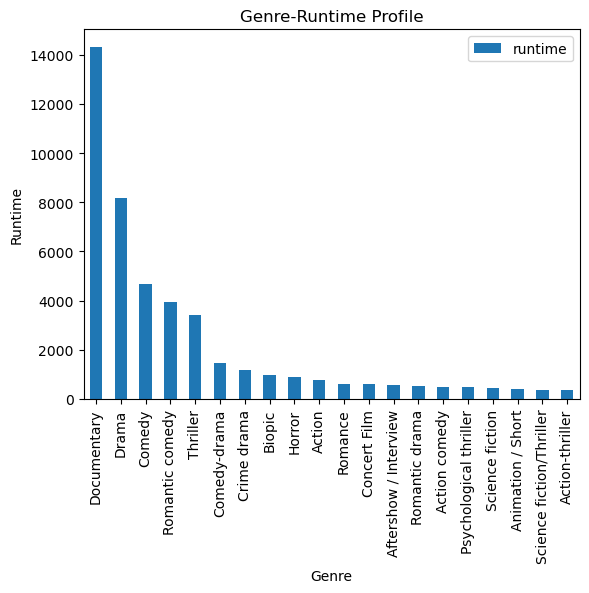

In [45]:
Genre_and_Runtime_group.head(20).plot(kind='bar')
plt.title('Genre-Runtime Profile')
plt.xlabel('Genre')
plt.ylabel('Runtime')
plt.show()

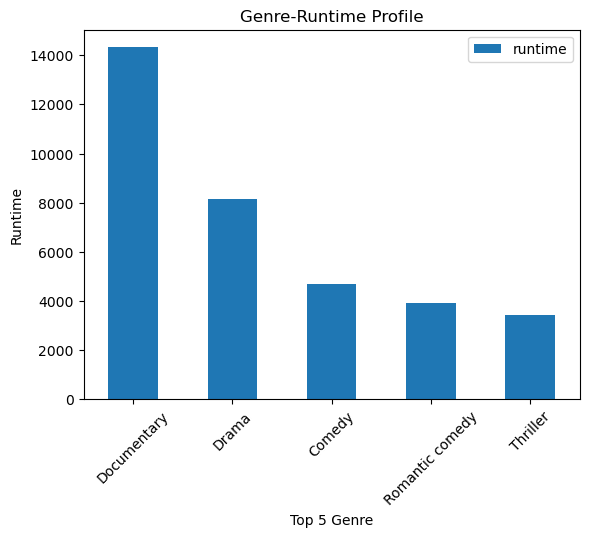

In [46]:
# For the Top 5 Genre Categories we have -
Genre_and_Runtime_group_top5.plot(kind='bar')
plt.title('Genre-Runtime Profile')
plt.xlabel('Top 5 Genre')
plt.ylabel('Runtime')
plt.xticks(rotation=45)
plt.show()

From the analysis it can be concluded that Documentary films are amongst the most sought after content category amongst Netflix users. Therefore, it can be said that a large percentage of Netflix user base is made up of people who are keenly interested in Documentary-Drama Biopic topics.

In [47]:
Genre_imdb_score_group = data.groupby('genre')['imdb_score'].sum()
Genre_imdb_score_group 

genre
Action              40.709239
Action comedy       29.209239
Action thriller      6.400000
Action-adventure     7.300000
Action-thriller     18.400000
                      ...    
War                 13.500000
War drama           14.200000
War-Comedy           6.000000
Western             18.200000
Zombie/Heist         5.900000
Name: imdb_score, Length: 114, dtype: float64

In [48]:
Genre_imdb_score_group = Genre_imdb_score_group.to_frame()
Genre_imdb_score_group.head()

,imdb_score
genre,
Action,40.709239
Action comedy,29.209239
Action thriller,6.400000
Action-adventure,7.300000
Action-thriller,18.400000


In [49]:
Genre_imdb_score_group.sort_values(by='imdb_score',ascending=False,inplace=True)
Genre_imdb_score_group 

,imdb_score
genre,
Documentary,1092.310870
Drama,490.609239
Comedy,276.627717
Romantic comedy,230.309239
Thriller,189.418478
...,...
Animation/Superhero,4.900000
Heist,4.800000
Anime / Short,4.700000


In [50]:
Genre_imdb_score_group_top5 = Genre_imdb_score_group.head()
Genre_imdb_score_group_top5

,imdb_score
genre,
Documentary,1092.310870
Drama,490.609239
Comedy,276.627717
Romantic comedy,230.309239
Thriller,189.418478


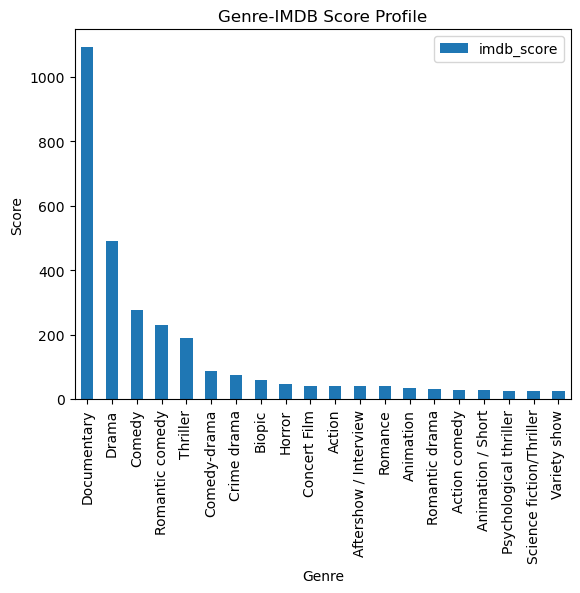

In [51]:
Genre_imdb_score_group.head(20).plot(kind='bar')
plt.title('Genre-IMDB Score Profile')
plt.xlabel('Genre')
plt.ylabel('Score')
plt.show()

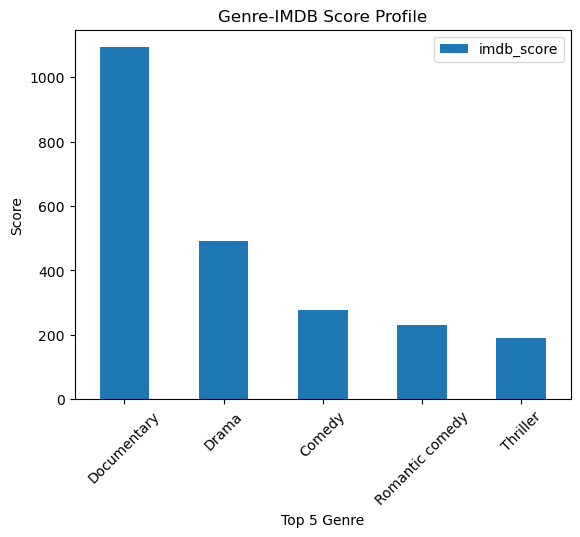

In [52]:
Genre_imdb_score_group_top5.plot(kind='bar')
plt.title('Genre-IMDB Score Profile')
plt.xlabel('Top 5 Genre')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()

From the analysis it can be concluded that Documentary films are amongst the most sought after content category amongst Netflix users based on the ImDB Scores metric. Therefore, it can be concluded that a large percentage of Netflix user base is made up of people who are keenly interested in Documentary-Drama Biopic topics.

In [53]:
# 6. To determine average popularity of content-feed genre based on Imdb Score and Runtime
data['imdb_score'].value_counts()

imdb_score
6.309239    31
6.300000    30
5.800000    30
7.100000    28
6.400000    28
6.500000    26
6.700000    25
6.100000    24
6.800000    24
7.300000    21
5.700000    20
7.200000    20
6.900000    19
5.200000    19
7.000000    19
5.500000    19
6.600000    18
6.200000    18
5.900000    16
5.600000    15
6.000000    13
5.400000    13
7.400000    12
5.300000    10
7.600000    10
7.500000    10
7.700000     8
4.600000     8
4.800000     7
5.100000     6
4.400000     6
4.700000     6
5.000000     5
4.500000     4
4.900000     4
7.900000     4
7.800000     3
8.100000     3
8.000000     1
Name: count, dtype: int64

In [54]:
data['runtime'].value_counts()

runtime
98.0     70
97.0     24
94.0     19
95.0     18
100.0    17
         ..
147.0     1
135.0     1
55.0      1
42.0      1
140.0     1
Name: count, Length: 92, dtype: int64

In [55]:

averagepopularity_genre_imdb_score = data.groupby('genre')['imdb_score'].mean()
print(averagepopularity_genre_imdb_score)
print()

averagepopularity_genre_runtime = data.groupby('genre')['runtime'].mean()
print(averagepopularity_genre_runtime)


genre
Action              5.815606
Action comedy       5.841848
Action thriller     6.400000
Action-adventure    7.300000
Action-thriller     6.133333
                      ...   
War                 6.750000
War drama           7.100000
War-Comedy          6.000000
Western             6.066667
Zombie/Heist        5.900000
Name: imdb_score, Length: 114, dtype: float64

genre
Action              108.000000
Action comedy       101.200000
Action thriller      82.000000
Action-adventure    121.000000
Action-thriller     119.666667
                       ...    
War                 110.500000
War drama           117.000000
War-Comedy          122.000000
Western             116.666667
Zombie/Heist         98.000000
Name: runtime, Length: 114, dtype: float64


In [56]:
print('General Average Popularity based on ImDB Scores :',averagepopularity_genre_imdb_score.mean())
print()

print('General Average Popularity based on Runtime :',averagepopularity_genre_runtime.mean())

General Average Popularity based on ImDB Scores : 6.151919780831132

General Average Popularity based on Runtime : 98.36396262835119


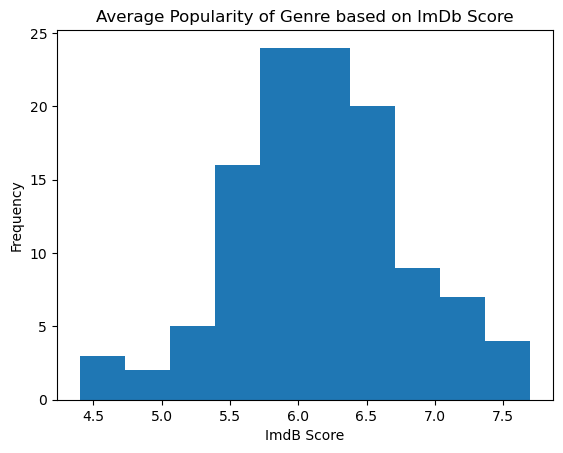

In [57]:
averagepopularity_genre_imdb_score.plot(kind='hist')
plt.title('Average Popularity of Genre based on ImDb Score')
plt.xlabel('ImdB Score')
plt.show()

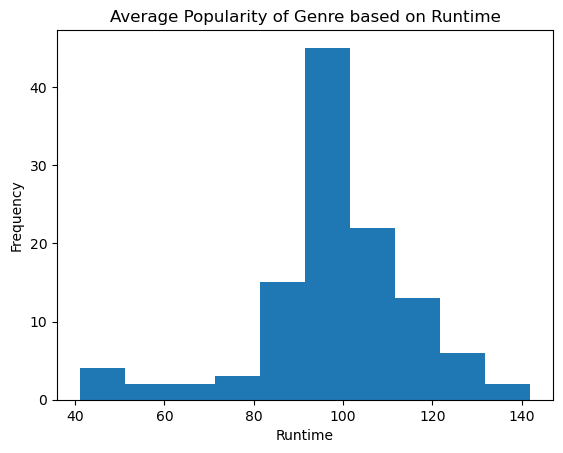

In [58]:
averagepopularity_genre_runtime.plot(kind='hist')
plt.title('Average Popularity of Genre based on Runtime')
plt.xlabel('Runtime')
plt.show()

It can be observed that the average imdb_score for popular content-feed genre is 6.151 and the average popularity based on runtime for popular content feed genre is 98.36

### Summary and Recommendations :

From the above analysis it can be ascertained that Documentary (27.3%) is the most frequently arising content feed type, followed by Drama (13.2%), together amounting to approximately 41% of the user base.

The majority of viewers of the given dataset population is English approximately 69% followed by Hindi (5.5%), Spanish (5.3%), French (3.4%), Italian (2.1%), Portugese (1.5%), Indonesian (1.2%), Korean(1.2%), Japanese(1.2%), German(< 1%).

From the above analysis it can be concluded that Documentary Genre is the most frequently occuring Genre across quarters of a calendar year.

From the analysis it can be concluded that Documentary films are amongst the most sought after content category amongst Netflix users. Therefore, it can be said that a large percentage of Netflix user base is made up of people who are keenly interested in Documentary-Drama Biopic,Geopolitics,Societal,etc topics which can be accounted for based on the 41% of user base obtained above.

It can be observed that the average imdb_score for popular content-feed genre is 6.151 and the average popularity based on runtime for popular content feed genre is 98.36